This example uses the *matrix* method to generate the *Hn*.  This example uses simple emoji style faces.

In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.core.Hypersimplex import NONE, VERTEX, BETA, ALPHA
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import draw_hn
from hypernetworks.utils.HTMatrix import to_matrix, from_matrix, matrix_to_string

import numpy as np

In [2]:
from IPython.display import Image, display

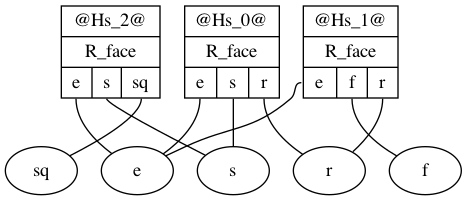

In [3]:
parser = load_parser()

face1 = Hypernetwork()

compile_hn(face1, parser, """
    <e, s, r; R_face>
    <e, f, r; R_face>
    <e, s, sq; R_face>
""")

draw_hn(face1, fname="/tmp/face1", view=False)
Image(filename='/tmp/face1.png', width=500, height=500)

@Hs_0@=<e, s, r; R_face>
@Hs_1@=<e, f, r; R_face>
@Hs_2@=<e, s, sq; R_face>



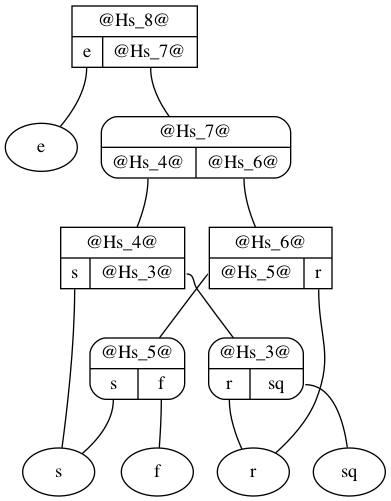

In [4]:
print(face1)

M = to_matrix(face1, R="face")
from_matrix(face1, M, R="face")

draw_hn(face1, fname="/tmp/face2", view=False)
Image(filename='/tmp/face2.png', width=400, height=600)

@Hs_0@=<e, s, r; R_face>
@Hs_1@=<e, f, r; R_face>
@Hs_2@=<e, s, sq; R_face>
@Hs_3@=<e, f, sq; R_face>



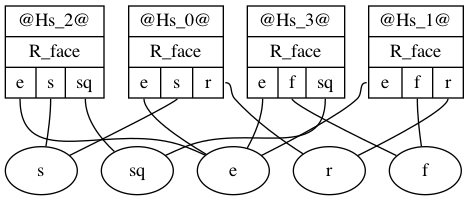

In [5]:
face3 = Hypernetwork()

compile_hn(face3, parser, """
    <e, s, r; R_face>
    <e, f, r; R_face>
    <e, s, sq; R_face>
    <e, f, sq; R_face>
""")

print(face3)

draw_hn(face3, fname="/tmp/face3", view=False)
Image(filename='/tmp/face3.png', width=600, height=600)

@Hs_4@={f, s}
@Hs_5@={r, sq}
@Hs_6@=<e, @Hs_4@, @Hs_5@>



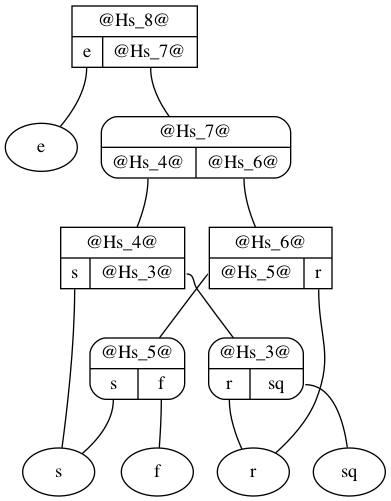

In [6]:
M = to_matrix(face3, R="face")

from_matrix(face3, M, R="face")

print(face3)

draw_hn(face3, fname="/tmp/face4", view=False)
Image(filename='/tmp/face2.png', width=400, height=600)

In [7]:
def format_hn(hn):
    class Hn:
        hn = {}
        
    def _first_pass():
        for name in hn.hypernetwork:
            hs = hn.hypernetwork[name]
            if hs.hstype in [ALPHA, BETA]:
                Hn.hn.update({name: hs})
        
    def _second_pass():
        for name, hs in Hn.hn.items():
            for i, vertex in enumerate(hs.simplex):
                if vertex[:4] == "@Hs_":
                    Hn.hn[vertex].simplex[i] = str(hn.hypernetwork[vertex])[len(vertex)+1:]
                    print("HELLO ", Hn.hn[vertex].simplex)

    hn_str = ""
    _first_pass()
    _second_pass()
    
#     for name in hn.hypernetwork:
#         hs = hn.hypernetwork[name]
#         hn_str = str(hs)

#         if hs.hstype in [ALPHA, BETA]:
#             for vertex in hs.simplex:
#                 if hn.hypernetwork[vertex].hstype in [ALPHA, BETA]:
#                     hs_str = str(hn.hypernetwork[vertex])[len(vertex)+1:]
#                     print(hs_str)
#                     hn_str.replace(vertex, hs_str)
#                     print(hn_str)

    return hn_str
                    
print(format_hn(face1))

HELLO  ['r', '{r, sq}']
HELLO  ['{s, f}', 'f']
HELLO  ['<s, @Hs_3@>', '@Hs_3@']
HELLO  ['@Hs_5@', '<@Hs_5@, r>']
HELLO  ['@Hs_4@', '{@Hs_4@, @Hs_6@}']

